$Introduction:$

Real world problems often involve dependencies between records in the data. For example sociologists are eager to understand an individual’s relationships and how his actions are influenced by his peers. Such dependency based problems can be modeled as graphs and various network analysis techniques can be implemented to answer them. We look at a special such type of network called an "ego" network. In an ego network, there is a “central” vertex or the ego vertex and the network revolves around it. Ego networks allow researchers to study the structure of an individual’s relationships with respect to his world. Our attempt is to model an individual's relationship data and determine unique and/or interesting features in his relationship.

The dataset in consideration is "Social Circles: Facebook" which can be accessed from (http://snap.stanford.edu/data/ego-Facebook.html) the Stanford Large Network Dataset Collection (to be cited as: J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012). Two zipped files can be found downloadable at the bottom of the page. One file is a Facebook combined ego networks dataset containing the combined network of ten individuals’ Facebook friends list. Each one of the ten individuals is an ego and the friends in their friends list is referred to as an "alter". Here, the nodes represent individuals on Facebook, and an edge between two alters means they are Facebook friends. Each ego-network was first created by starting with a Facebook user (ego) and then mining all of his Facebook friends (alters). The ego-networks are then aggregated by identifying individuals who appear in multiple ego-networks. The second file is a collection of separate datasets containing the social circles for each one of the ten egos. The datasets upon unzipping can be read to a python file by using networkx.read_edgelist included in the networkx package.

Here’s some basic information about the combined ego network dataset:
1. Number of Nodes: 4039
2. Number of Edges: 88234
3. Average Degree: 43.6910

After one of the 10 Facebook user was choosen at random, his ego network dataset has the following information:
1. Number of Nodes: 333
2. Number of Edges: 2519
3. Average Degree: 15.1291

Facebook friends list give a close to accurate information of a person's relationships owing to its bi-directional nature, unlike Instagram, Google+ or Twitter. These are often real-world connections of the person (or ego). Analyzing such an ego network can shed light on interesting features that the person might identify himself with. We attempt to do the same in this project. After determining any prevalent community structure in the Facebook combined ego network dataset and an interesting feature or community, we wish to determine if a particular user identifies himself with that feature or community. Towards this goal, we perform some initial exploratory network analysis and subsequently apply community detection techniques to arrive at conclusions.

$Methods:$

We start off by importing the required packages and reading the Facebook combined ego networks dataset.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Starting off with exploratory analysis on combined data
G_fb=nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In order to visualize the network, we start by fixing positions of the nodes according to the spring layout and then executing the draw_graph function. Fixing the nodal positions help to maintain consistency in comparison throughout the project.

In [26]:
position=nx.spring_layout(G_fb)

In [27]:
def draw_graph(G,position, size = 8, directed = False, node_size = 50, line_width = 20, edge_width = 1):
    f = plt.figure(figsize=[size,size])
    ax = plt.Axes(f, [0., 0., 1., 1.])
    ax.set_aspect('equal')
    ax.set_axis_off()
    f.add_axes(ax)

#     pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos = position, node_size = node_size, linewidth = line_width, alpha=0.5,color='r')
    nx.draw_networkx_edges(G, pos = position, width = edge_width, alpha=0.6)
    

    plt.savefig("Combined_data.png") # save as png
    plt.show()
    plt.close(f)

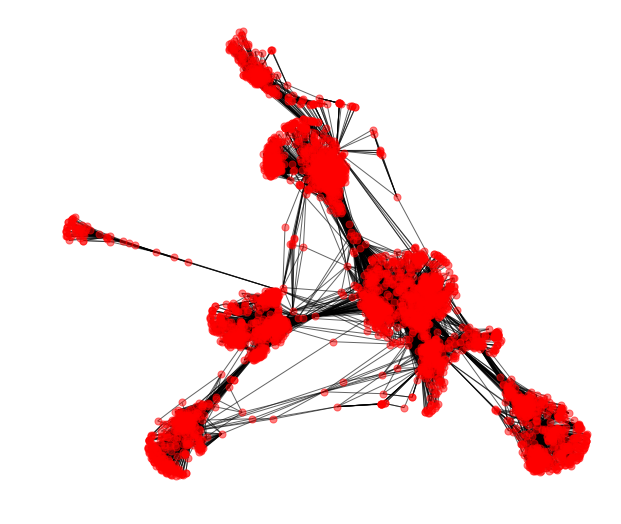

In [28]:
draw_graph(G_fb,position)

It can be seen upon observation that there is an underlying community structure in the combined ego network. The network is fairly connected with the number of edges more than 20 times the number of nodes. Hence it is densely clustered. Furthermore, we can see the appearance of hubs of vertices. These hubs are important features in real-world social networks. in order to have a more accurate community separation, we perform the Louvain community detection on the above network.

In [29]:
import community #using Louvain Community Detection

def comm_grayscale(G,position):
    
    # first compute the best partition
    partition = community.best_partition(G)

    # drawing the graph
    size = float(len(set(partition.values())))
#     pos = nx.spring_layout(G)
    count = 0.
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, position, list_nodes, node_size = 20, node_color = str(count / size))

    nx.draw_networkx_edges(G,position, alpha=0.5)
    plt.show()

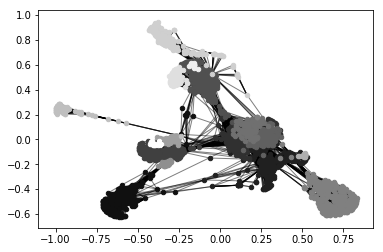

In [30]:
comm_grayscale(G_fb,position)

The above grayscale image of the network gives us a very clear idea of the different communities prevalent in the combined ego networks data. Of particular interest here is the community at location $(-1.00,0.25)$. This community is very likely a representative of an interesting identification feature owing to how disconnected it is from several other communities. The existence of such a unique community births a rather interesting curiosity. We would like to determine if out of the ten users, a certain user identifies himself with the feature that is representative of this community, either in part or in full. To answer this question we randomly selected user $"0"$ from the second file and began exploring his ego network.

In [31]:
# Selecting a Facebook user at random for our analysis

EO=open("0.edges",'rb')
ego=nx.read_edgelist(EO)

print(nx.info(ego))

Name: 
Type: Graph
Number of nodes: 333
Number of edges: 2519
Average degree:  15.1291


This selected ego network has 333 alters, i.e. user $0$ has 333 friends in his friends list. In order to understand his relationship structure we modelled his alter network below.

<function matplotlib.pyplot.show(*args, **kw)>

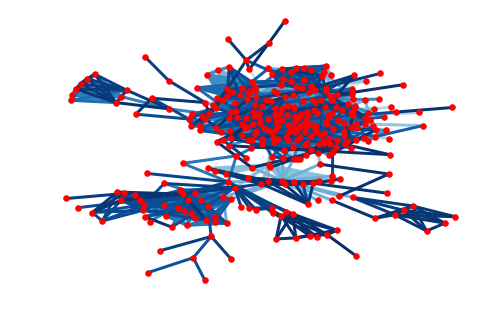

In [32]:
pos=nx.kamada_kawai_layout(ego)

colors=range(2519)
nx.draw(ego, pos = pos, width = 3,node_size=30,edge_cmap=plt.cm.Blues, 
        node_color='r',edge_color=colors,with_labels=False)
plt.savefig("edge_colormap.png") # save as png
plt.show

It can be observed that the network is fairly connected with no immediately observable outliers. We elaborate on our interest in outliers for this network on the grounds that, the community with the feature of interest was relatively quite small in comparison to the other communities. So, given a fairly connected network, one would expect alters in that unique community in the form of outliers in an otherwise densely clustered hub. Hence we perform Louvain community detection a second time on this smaller ego network to determine the existence of outliers. We write our program such that we have the following informations:
1. graphical representation of the network that clearly identifies outliers,
2. using the graphical information, return a list of nodes (or alters) that are outliers, and
3. return a list of representatives from the communities whose features are not classified as outlying.

236
24
329
213
82
84
127
116
6
['275' '273' '78' '218' '195' '181' '328' '306' '152' '4' '33' '42' '90'
 '179' '145' '282' '244' '233' '256']


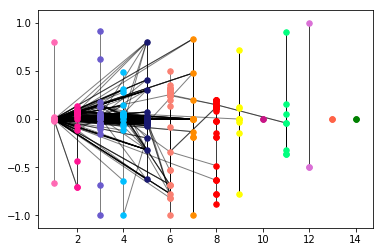

In [36]:
import community
import numpy as np
partition = community.best_partition(ego)
size = float(len(set(partition.values())))
pos = nx.kamada_kawai_layout(ego)
positions={}
outliers=()
count = 0
colors=('#ff69b4','#ff1493','#6a5acd','#00bfff','#191970','#fa8072','#ff8c00','r','#ffff00','#c71585',
        '#00ff7f','#da70d6', '#ff6347','g')
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    G=ego.subgraph(list_nodes)
    pos_new=nx.spectral_layout(G)
#    print(pos_new)
    for i in range((len(pos_new))):
        pos_new[list_nodes[i]][0]=1*count
    positions.update(pos_new)
    nx.draw_networkx_nodes(ego, positions, list_nodes, node_size = 30, node_color = colors[count-1])
    
#   extra portion to determine community outlier features
    if count in [9,10,12,13,14]:
        outliers=np.append(outliers,list_nodes)
    else: print(list_nodes[0])
print(outliers)   

nx.draw_networkx_edges(ego,positions, alpha=0.5)

plt.savefig("user_comm_detection.png") # save as png
plt.show()

With this, we now have as outliers, communities with features identified by features $10,12,13$ and $14$. All that remains is to check where these outliers lie with respect to the original combined ego community network.

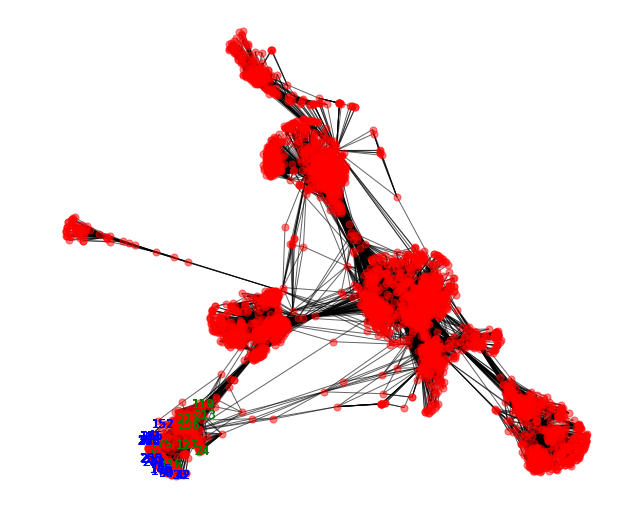

In [34]:
import numpy as np
def draw_graph_with_outliers(G,position, size = 8, directed = False, node_size = 50, line_width = 20, edge_width = 1):
    f = plt.figure(figsize=[size,size])
    ax = plt.Axes(f, [0., 0., 1., 1.])
    ax.set_aspect('equal')
    ax.set_axis_off()
    f.add_axes(ax)

#     pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos = position, node_size = node_size, linewidth = line_width, alpha=0.5,color='r')
    nx.draw_networkx_edges(G, pos = position, width = edge_width, alpha=0.6)
    
    label1={}
    label2={}
    for node in G.nodes():
        if node in [275,273,78,218,195,181,328,306,152,4,33,42,90,179,145,282,244,233,256]:
            label1[node]=node
            nx.draw_networkx_labels(G,position,label1,font_size=12,font_color='b')
        elif node in [236,24,271,213,175,127,116,119,6]:
            label2[node]=node
            nx.draw_networkx_labels(G,position,label2,font_size=12,font_color='g')
    
    plt.show()
    plt.close(f)
    
draw_graph_with_outliers(G_fb,position)

We see something interesting when the outlier labels (marked in blue) are superimposed on the original combined ego network. They lie completely on a different hub. This makes one wonder if it is possible that the user actually identifies himself almost entirely with the community represented by the feature of interest and whether he keeps minimal connections with a different hub. We superimpose the non-outlier representative labels (marked in green) to the same ego network and see user $0$ has no features indicative of our community of interest. The following code was executed to help in determining the non-outlier representatives from the alters and to look at how the alters identify with representative features in general.

In [35]:
print(partition.values()) # Set of identifiers that identify each alter with a community
size = float(len(set(partition.values()))) # number of communitites found by the algorithm
print(size,list_nodes)

dict_values([0, 1, 0, 0, 2, 2, 1, 1, 3, 3, 2, 4, 2, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 1, 5, 0, 0, 1, 1, 0, 2, 3, 3, 5, 5, 1, 2, 2, 0, 0, 6, 6, 1, 3, 5, 7, 2, 2, 0, 0, 4, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 6, 1, 3, 2, 6, 0, 6, 6, 1, 8, 8, 5, 7, 7, 2, 7, 7, 7, 7, 7, 0, 0, 0, 3, 1, 1, 1, 1, 3, 8, 0, 0, 0, 0, 2, 4, 4, 6, 1, 0, 0, 1, 3, 0, 4, 4, 0, 2, 0, 1, 3, 7, 7, 3, 3, 1, 0, 2, 2, 2, 6, 6, 7, 1, 1, 7, 7, 2, 2, 0, 1, 0, 0, 0, 7, 7, 6, 3, 0, 1, 6, 7, 7, 7, 7, 3, 3, 1, 4, 4, 7, 7, 7, 7, 0, 1, 2, 1, 1, 4, 2, 1, 5, 0, 5, 0, 6, 2, 7, 7, 1, 2, 3, 6, 0, 1, 3, 3, 1, 3, 3, 2, 3, 0, 4, 4, 7, 7, 9, 9, 0, 7, 6, 5, 7, 5, 1, 7, 7, 3, 8, 1, 1, 0, 0, 7, 7, 8, 8, 5, 5, 0, 8, 1, 4, 2, 5, 5, 5, 1, 4, 4, 3, 3, 8, 5, 2, 0, 4, 0, 5, 0, 4, 4, 7, 5, 0, 5, 5, 5, 7, 7, 0, 10, 10, 4, 3, 0, 0, 0, 4, 1, 0, 1, 7, 4, 5, 5, 5, 5, 8, 3, 3, 5, 7, 2, 2, 5, 5, 5, 0, 1, 7, 7, 1, 7, 1, 5, 7, 5, 7, 11, 11, 7, 7, 11, 5, 8, 10, 10, 0, 0, 5, 12, 12, 10, 13, 13, 4, 4, 5, 2, 10, 2, 5, 7, 2, 5, 0, 10, 7, 3, 10, 4, 7, 2, 7, 0, 

$Discussion:$

We saw that user $0$ maintains relationships in a particular densely clustered hub. So he possesses no unique identification features indicative of belonging to our community of interest. However among the $14$ different identification features found in the user's ego network, there were a few unique friends (or alters) who inspite of belonging to such a well connected hub had minimal to no interactions with alters from the remaining communities within the ego network of user $0$. Similar analysis and inferences can be made with ego networks of different users and subsequent compartive inferences can be drawn as well. An important note here is that the network analysis technique gives a good visual depiction of the network model. However what would be more fascinating to see is the probability associated with friend requests from alters belonging to different communities.

$ References:$

1. Louvain-community Detection, https://github.com/taynaud/python-louvain/
2. Social circles: Facebook, http://snap.stanford.edu/data/ego-Facebook.html
3. J. McAuley and J. Leskovec, Learning to Discover Social Circles in Ego Networks. NIPS, 2012.
4. M. Nandi, Social Network Analysis with Networkx, https://blog.dominodatalab.com/social-network-analysis-with-networkx/